In [170]:
!kaggle competitions download -c data-science-london-scikit-learn

data-science-london-scikit-learn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
train = pd.read_csv("train.csv", header=None) # remove the header
Y_train = pd.read_csv("trainLabels.csv", header=None) 
test = pd.read_csv("test.csv", header=None)

In [173]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [175]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [176]:
train.shape

(1000, 40)

In [177]:
Y_train.shape

(1000, 1)

In [178]:
test.shape

(9000, 40)

## Well, this is fucked up.

This is a synthetic data .csv, so don't expect to have something that makes sense. However, we know that this dataset was created for:
- How to perform scalable text feature extraction with the Hashing Trick
- How to parallelize or distribute model evaluation (cross validation)and hyper parameters tuning
- How to optimize memory usage with memory mapping
- How to approximate kernel Support Vector Machines for large scale datasets
- A short introduction to Ensembles with model averaging and Random Forests

## Hashing Trick

Also known as `feature hashing` or `kernel trick`. The idea of this algorithm is to **optimise** the data selection (when working with large datasets). This can be done hashing arbitrary features and turning them into a vector or matrix.

## KNN Model without normalization

I don't have any idea how to relate this. Then, the only thing I can do is to look for similarities in the neighbors given an instance.

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [180]:
X, y = train, np.ravel(Y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [181]:
# Model complexity
neig = np.arange(1, 25) # number of possible neighbors
kfold = 10 # for cross-validation
train_accuracy = [] # for plotting
val_accuracy = [] # for plotting
bestKnn = None
bestAcc = 0.0

# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    # cross_val_score() returns an array of the total score per iteration
    test_acc = np.mean(cross_val_score(knn, X, y, cv=kfold))
    val_accuracy.append(np.mean(test_acc))
    if np.mean(test_acc) > bestAcc:
        bestAcc = test_acc
        bestKnn = knn

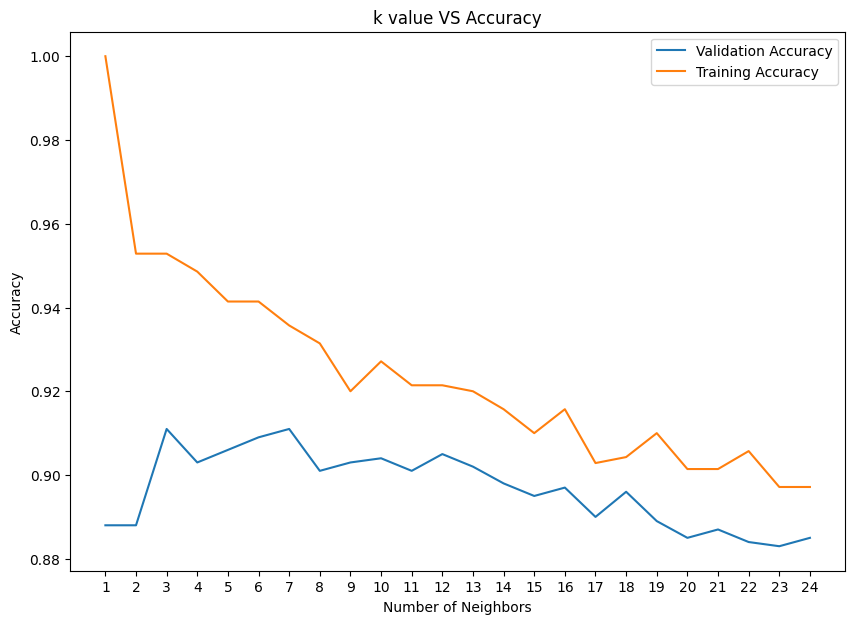

Best Accuracy without feature scaling: 0.9109999999999999
KNeighborsClassifier(n_neighbors=np.int64(3))


In [182]:
# Plot
plt.figure(figsize=(10, 7))
plt.plot(neig, val_accuracy, label = 'Validation Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy without feature scaling:', bestAcc)
print(bestKnn)

In [183]:
test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [184]:
submission = bestKnn.predict(test)
submission = pd.DataFrame({
    "Id": range(1, len(submission) + 1, 1),
    "Solution": submission,
})
submission.head()

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0


In [185]:
submission.shape

(9000, 2)

In [186]:
submission.to_csv("submission_no_normalization.csv", index=False)

## KNN with normalization

What will happen if we normalise the data? Would the accuracy improve?
Notice that we have the data processed. Remember that we can use three types of normalizers:

- MinMaxScaler()
- Standarization()
- Robust Scaler(): based on outliers

Although I would like to know if there are outliers, we cannot understand it as they are just pure numerical values.

In [187]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [188]:
k = np.arange(1,25)
kfold = 10
train_accuracy = []
val_accuracy = []
scalers = ["MinMax(), Standarization()"]
bestKnn = None
bestacc = 0.0

In [189]:
for neigh in k:
    model = KNeighborsClassifier(n_neighbors=neigh)
    for scaler in scalers:
        if scaler == "MinMax()":
            pipeline = Pipeline([("scaler", MinMaxScaler()),
                                 ("model", model)])
        else: 
            pipeline = Pipeline([("scaler", StandardScaler()),
                                 ("model", model)])
        pipeline.fit(X_train, y_train)
    
        trainScore = pipeline.score(X_train, y_train)
        train_accuracy.append(trainScore)
    
        testAcc = np.mean(cross_val_score(model, X, y, cv=kfold))
        val_accuracy.append(np.mean(testAcc))
    
        if testAcc > bestacc:
            bestKnn = pipeline
            bestacc = testAcc
        

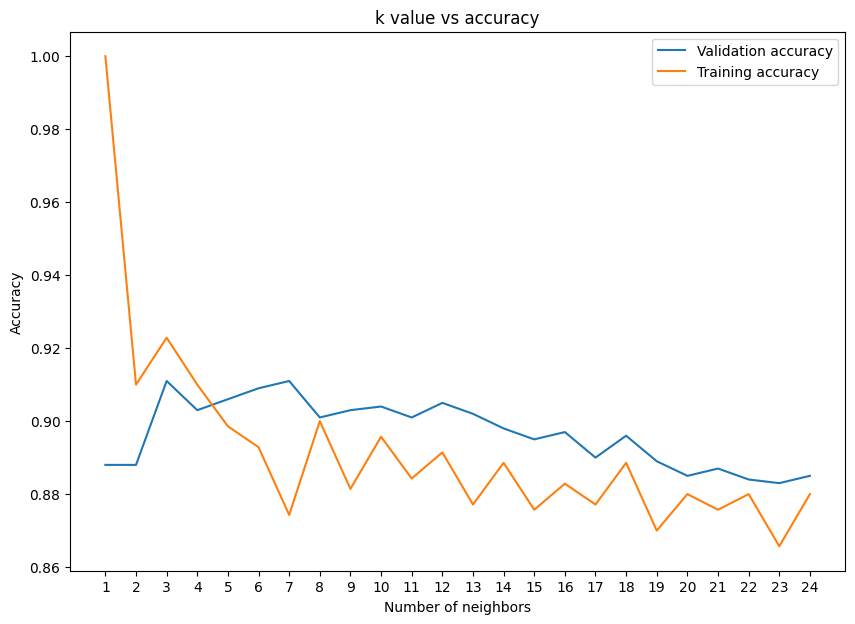

Best Accuracy with feature scaling: 0.9109999999999999
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=np.int64(3)))])


In [190]:
plt.figure(figsize=(10, 7))
plt.plot(k, val_accuracy, label = "Validation accuracy")
plt.plot(k, train_accuracy, label = "Training accuracy")
plt.legend()
plt.title("k value vs accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.xticks(k)
plt.show()

print('Best Accuracy with feature scaling:', bestacc)
print(bestKnn)


Accuracy has increased a little bit more!

In [195]:
submission = bestKnn.predict(test)
submission = pd.DataFrame({
    "Id":range(1, len(submission)+1, 1), 
    "Solution": submission,
})
submission.head()

,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [197]:
submission.shape

(9000, 2)

In [198]:
submission.to_csv("submission_normalised.csv", index=False)